- [export](##export)
- [plot](#plot)
  - [pandas](##pandas)
  - [matplotlib](##pyplot)

In [50]:
import pandas as pd
# pd.read_stata("d://623.dta").to_csv("623.csv",index=False)
import matplotlib.pyplot as plt
import sqldf

In [116]:
def plotCP(reported=1, size:tuple=(16,9), cols=["avg(reportedcompl)","avg(similarCPcompl)","avg(distantCPcompl)"],xax="",yax="",title=""):
    global cp
    cols.append("halfyear")
    cp.loc[cp.reportedcnty==reported,cols].plot(x="halfyear", figsize=size,xlabel=xax, ylabel=yax, title=title)

In [6]:
df=pd.read_stata("623.dta")

In [8]:
df.columns

Index(['QuestID', 'Country', 'City', 'Cycle', 'AssesmentDate', 'year', 'month',
       'yearforpanel', 'FactoryAssessedID', 'TypeOfAssessment', 'union', 'mng',
       'YearOperate', 'factoryage', 'factoryageln', 'CBA', 'femalepc', 'size',
       'regularwkpc', 'OnsiteAudit', 'HasStrike', 'onsitedummy', 'buy1country',
       'buyer1BW', 'buyer1FLA', 'pressfreedom', 'NoBWbuyers', 'after17jul',
       'totalitems', 'totalvios', 'overallcompl', 'reporteditems',
       'reportedvios', 'reportedcompl', 'similarCPitems', 'similarCPvios',
       'similarCPcompl', 'distantCPitems', 'distantCPvios', 'distantCPcompl',
       'reportedcnty', 'buyer1name', 'buyer2name', 'buyer3name',
       'buyer1BWmissingas0', 'buyer1FLAmissingas0', 'buyer1ETImissingas0',
       'NoBWbuyersmissingas0', 'auditdate', 'auditmonth'],
      dtype='object')

In [21]:
df["halfyear"]=(df["year"]-2014)*2+(df["month"]).apply(lambda x : 0 if x>6 else -1)

In [22]:
df["halfyear"].nunique()

14

In [27]:
df[["halfyear",'auditdate']].tail(5)

,halfyear,auditdate
6204,14,2021-09-07
6205,14,2021-09-07
6206,14,2021-08-22
6207,14,2021-08-30
6208,14,2021-08-26


In [28]:
df.groupby("reportedcnty").Country.value_counts()

reportedcnty  Country   
0.0           Cambodia      2236
              Bangladesh     584
1.0           Vietnam       1802
              Indonesia      833
              Jordan         474
              Haiti          161
              Nicaragua      119
Name: Country, dtype: int64

In [118]:
df[df.reportedcnty==0].auditdate.str[:7].unique()

array(['2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10',
       '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04',
       '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10',
       '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
       '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10',
       '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04',
       '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10',
       '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04',
       '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10',
       '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-08',
       '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02'],
      dtype=object)

In [48]:
cp=df[["reportedcompl","similarCPcompl","distantCPcompl","halfyear","reportedcnty"]]

In [62]:
cp=sqldf.run('''select avg(reportedcompl),avg(similarCPcompl),avg(distantCPcompl), reportedcnty, halfyear
           from cp group by reportedcnty, halfyear''')

## export:

In [119]:
cp.to_stata("cp.dta",version=118)

d:\Software\Anaconda3\lib\site-packages\pandas\io\stata.py:2491: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    avg(reportedcompl)   ->   avg_reportedcompl_
    avg(similarCPcompl)   ->   avg_similarCPcompl_
    avg(distantCPcompl)   ->   avg_distantCPcompl_

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)

  warnings.warn(ws, InvalidColumnName)


In [120]:
cp.to_csv("cp.csv",index=False)

---

# plot:
## pandas:

<AxesSubplot:xlabel='halfyear'>

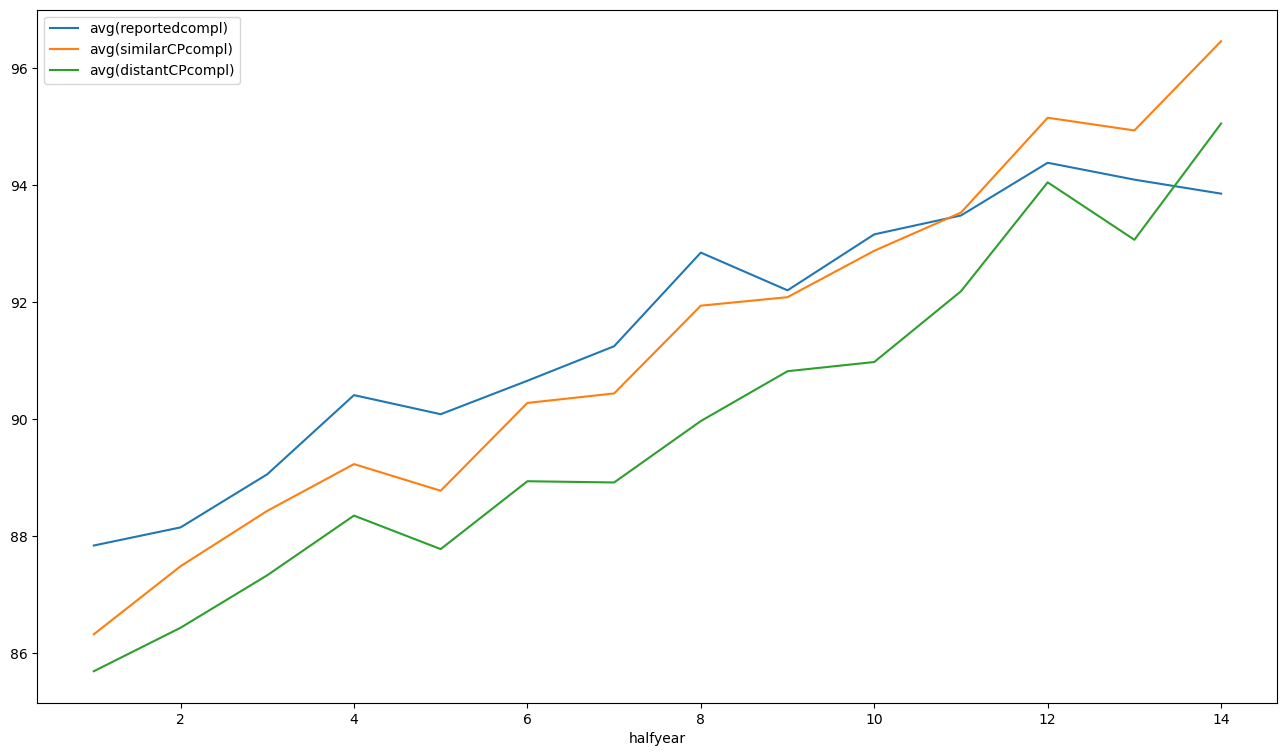

In [66]:
cp[cp.reportedcnty==1].drop("reportedcnty",axis=1).plot(x="halfyear", figsize=(16,9))
# plotCP(size=(20,10))

<AxesSubplot:xlabel='halfyear'>

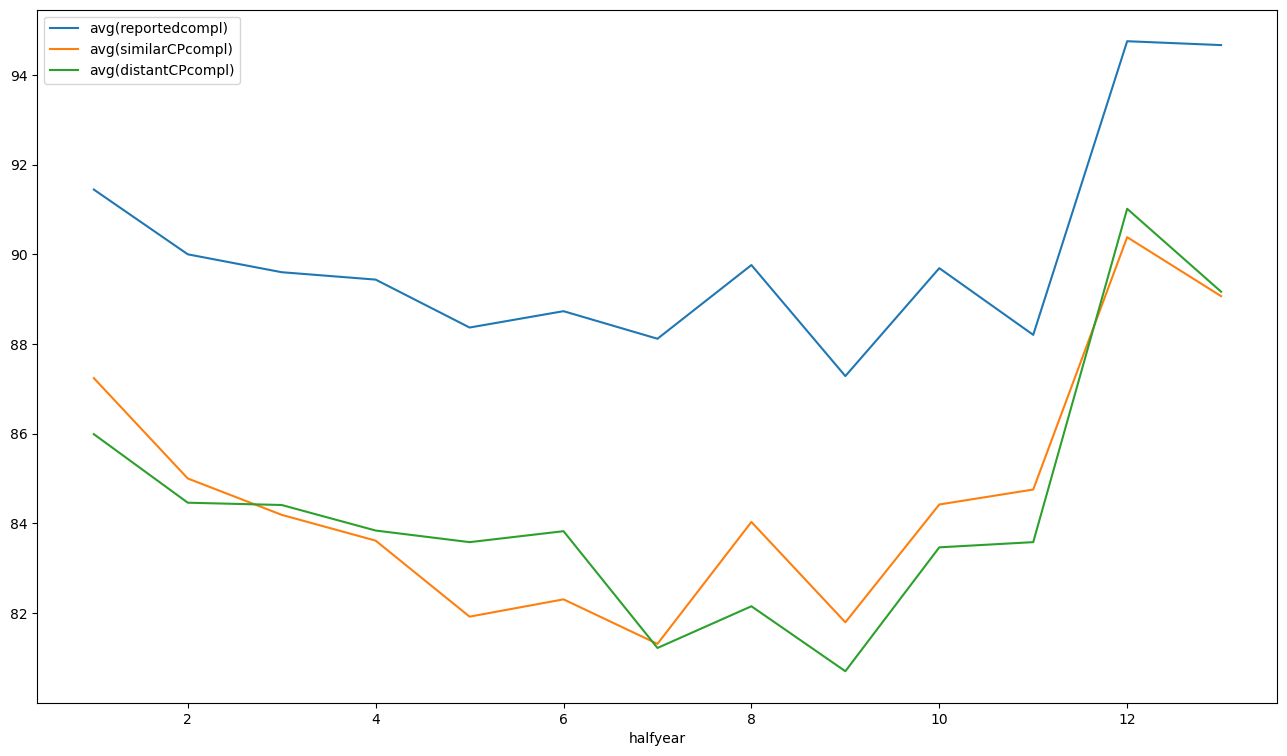

In [80]:
cp[cp.reportedcnty==0].drop("reportedcnty",axis=1).plot(x="halfyear", figsize=(16,9))

## pyplot:

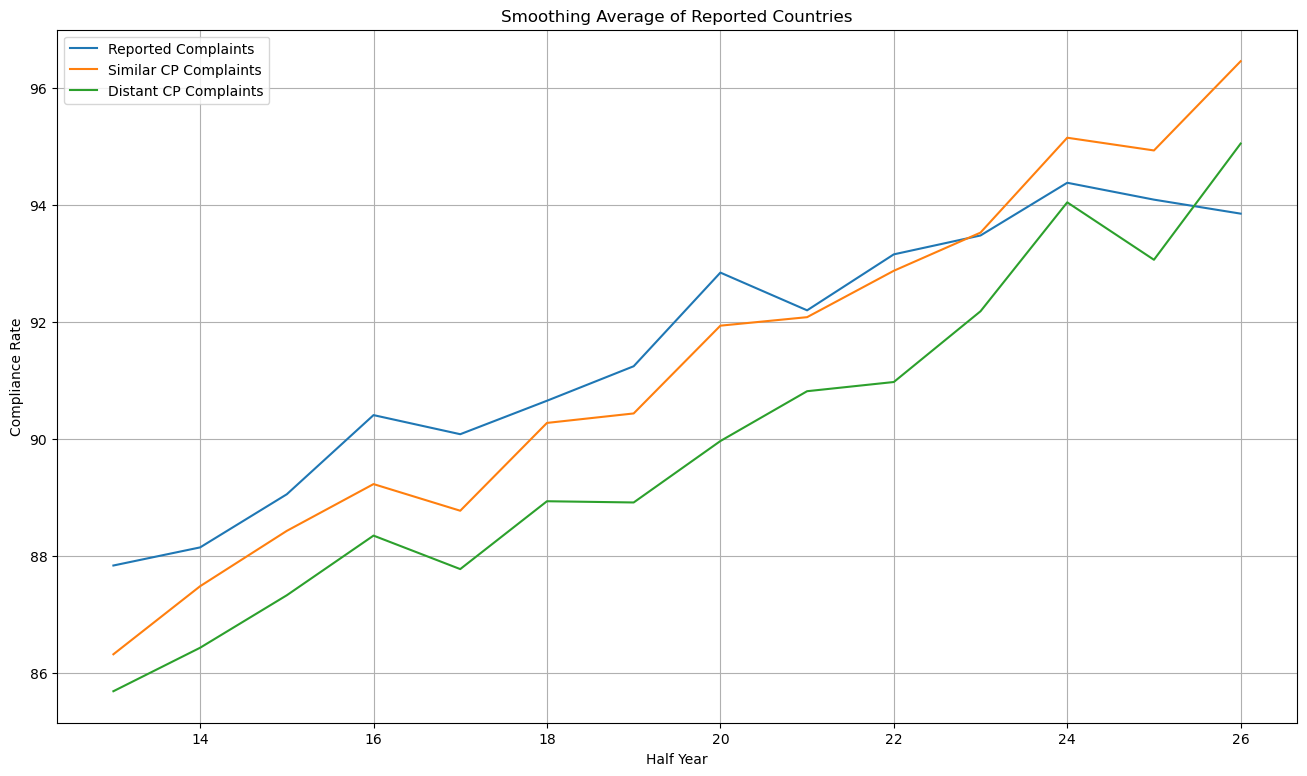

In [70]:
plt.figure(figsize=(16, 9))
cp[cp.reportedcnty==1].drop(["halfyear","reportedcnty"],axis=1).plot(ax=plt.gca())
plt.title('Smoothing Average of Reported Countries')
plt.xlabel('Half Year')
plt.ylabel('Compliance Rate')
plt.legend(['Reported Complaints', 'Similar CP Complaints', 'Distant CP Complaints'])
plt.grid(True)
plt.show()